<img src='./images/Banner.jpg'/>

# KNearestNeighbor from Scratch
##### A Simple Introduction to ML,
<p> by &copy; El Amraoui Sohayb</p>

## Outline
1.  [Objectives](#0)
1.  [Machine Learning](#1)
1.  [Types of Learning](#2)
    1.  [Supervised Learnojg](#2.1)
    1.  [Unsupervised Learning](#2.2)
    1.  [Reinforcment Learning](#2.3)
    1.  [Regression and Classification](#2.4)
1.  [EDA: Exploratory Data Analysis](#3)
    1.  [Load Data](#3.1)
    1.  [Collect general information](#3.2)
    1.  [Data Visualisation](#3.3)
    1.  [Correlation Matirx](#3.4)
    1.  [More on EDA](#3.5)
1.  [On to Modelling](#4)
    1.  [Split Data](#4.1)
    1.  [K-NN Algorithm](#4.2)
    1.  [Evaluating Model Performences](#4.3)
    1.  [Define Euclidian Distance](#4.4)
    1.  [1NN with Euclidian Distance](#4.5)
    1.  [3NN with Euclidian Distance](#4.6)
    1.  [General KNN with Different Distances](#4.7)
1.  [Comparing with Sklearn](#5)
1.  [Summary](#6)
1.  [Where to Go Next?](#7)

## <a id="0">Objectives:</a>
This tutorial aims to present what is **Machine Learning**, and how it can be applied on data to asnwer a business problem.

After a brief intoroduction to Machine Learning, we will explore  
   - The Iris Dataset

Next, we will devlopp and apply on our datasets, one of the simple **Machine Learning** algorithmes: ***The Nearest Neighbor Algorithme***

Finally, we will compare our impelentation with the **Sickit-learn** implementation of the Nearest Neighbor Algorithm.


## <a id="1">Machine Learning</a>
> It is the Modeling of Mathematic principles and properties into algorithms and techniques that
enable the detection of patterns in the input Data and inferring on the basis of these patterns in
the future use.

The goal being to give computers the ability to learn patterns from data and make decisions without being explicitly programmed.

**Classic Examples:**
- Classifying an email as spam or not.
- Predicting the estimated sale price of a house.

<img src='./images/ML Pipeline.PNG'/>

## <a id="2">Types of Learning</a>
### <a id="2.1">Supervised Learning
It's learning by Feedback, we disposed of labeled Input Data, meaning for each input observation -formed by a set of features-, there is an output result which is the label.
Under supervised learning, we are using our Input Data to make the model learn as much patterns as possible, so it can deduce the correct label for new observations.
<img src='./images/Supervised.PNG'/>
#### <a id="2.2">Unsupervised Learning</a>
When you dispose of Data without labels, your goal is to extract insights based solely on the input observations.

A Classic use case for this type of learning is: **“Anomaly detection”**, where the goal is to describing how much a particular observation in our input Data is different from the **“typical”** or **“standard”** observations in the same input Data. 

Another example is **“Dimensionality reduction”**, in which we want to retain only the most informative features in our observations, and remove the rest of the features, i.e.: dimensions.
<img src='./images/Unsupervised.PNG'/>
### <a id="2.3">Reinforcment Learning</a>
A specific case of feedback learning, Reinforcement learning treat the machine as a living mind, we provide it with a set of allowed actions, corresponding rewards or penalties, rules and potential end states, and we tasked it to find the optimal policy that would maximize the rewards, which means reaching the desired end state or goal in an optimal decision making chain.

In practice, this type of learning lends itself to problems with sequential decision making, and a long-term goal, the famous field of application are robotics and game playing, but it used also in more traditional business applications, such as logistics, transports navigation, and resource management.
<img src='./images/Reinforcment.PNG'/>

### <a id="2.4">Regression and classification</a>

Variables can be characterized as either quantitative or qualitative (also known as categorical).

- **Quantitative variables** take on numerical values, such as: a person’s age, height, or income, the value of a house, and the price of a stock.
- **Qualitative variables** take on values in one of N different classes, or categories. Examples: a person’s gender (male or female), the brand of a product (brand A, B, or C), whether a person defaults on a debt (yes or no).

We refer to problems with a **quantitative label** as **regression problems**, while those involving a **qualitative label** are **classification problems**.

## <a id="3">EDA: Exploratory Data Analysis</a>
### <a id="3.1">Loading Data</a>

The Iris Dataset can be Loaded with Scickit-learn "load_iris()" methode, or reading the ".csv" file provided.
 - The Features:
        ● Petal length
        ● Petal width
        ● Sepal length
        ● Sepal width
 - The Target variable: Species
        ● Versicolor
        ● Virginica
        ● Setosa
<img src='./images/iris.PNG'/>

In [1]:
import numpy as np
import pandas as pd
## Loading iris using Sklearn:
#from sklearn.datasets import load_iris
#iris = load_iris()
iris = pd.read_csv("iris.csv")

### <a id="3.2">Collect general information: Using Head(), Describe(), Info()</a>

In [2]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


### <a id="3.3">Data Visualization</a>

In [5]:
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

Let's start analyzing our target, using the describe function.

In [6]:
iris['target'].describe()

count    150.000000
mean       1.000000
std        0.819232
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: target, dtype: float64

At this point, we can plot the count

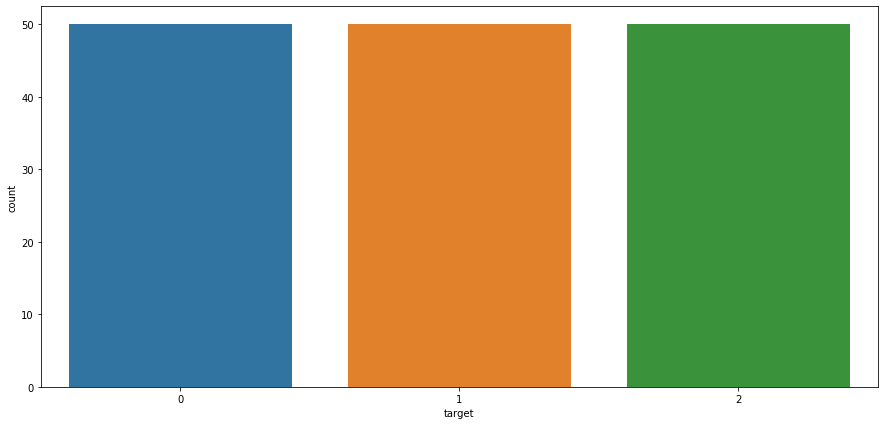

In [7]:
plt.figure(figsize=(15,7))
sns.countplot(iris['target'])

### <a id="3.4">Correlation matrix</a>

Let's now find correlations between our variables using a correlation matrix.

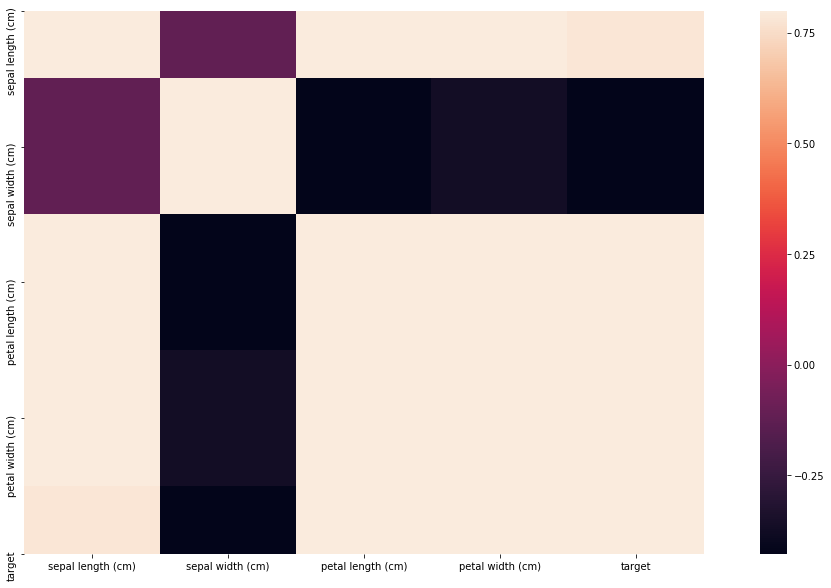

In [8]:
#correlation matrix
corrmat = iris.corr()
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrmat, vmax=.8, square=True);

### <a id="3.5">More on EDA and Features selection</a>

##### Some of the main things that need to be checked are:
- Is my data missing values? (And the answer is yes most of the time!)
- Should i drop or fill the data, if the later then how?
- What are the statistical properties of the data? How to deal with outliers?
- How to deal with categorical data?

##### These questions can be invistigated in 4 Major steps:
- **Formatting:** The data needs to be presented in a useable format. Using an industrystandard format enable plugging the solution with multiple vendors that in turn can mix and match algorithms and data sources such as XML, HTML, and SOAP.
- **Cleaning:*** The data needs to be cleaned by removing, substituting, or fixing corrupt or missing data. In some cases, data needs to be normalized, discretized, averaged, smoothened, or differentiated for efficient usage. In other cases, data may need to be transmitted as integers, double precisions, or strings.
- **Sampling:** Data need to be sampled at regular or adaptive intervals in a manner such that redundancy is minimized without the loss of information for transmission via communication channels.
- **Feature engineering:** Create (by way of inclusion, aggregation, and transformation) data features from the raw data to facilitate model training, the insights obtained from the data understanding and Visualizing steps and the level of domain expertise are key

## <a id="4">On to Modelling</a>

### <a id="4.1">Split Data</a>

Split the dataset into the training and test sets, Using the function **"train_test_split()"** in sklearn, We can fix the same random_state for reproducibality purposes.

In [9]:
from sklearn.model_selection import train_test_split
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(iris.drop(columns =['target']), iris['target'],test_size = 0.4, random_state=33)

In [10]:
X_train_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
133,6.3,2.8,5.1,1.5
8,4.4,2.9,1.4,0.2
4,5.0,3.6,1.4,0.2
129,7.2,3.0,5.8,1.6
85,6.0,3.4,4.5,1.6


In [11]:
y_train_iris = y_train_iris.reset_index(drop = True)
y_test_iris = y_test_iris.reset_index(drop = True)
X_train_iris = X_train_iris.reset_index(drop = True)
X_test_iris = X_test_iris.reset_index(drop = True)

### <a id="4.2">K-NN Algorithm</a>

<img src='./images/KNN.PNG'/>

#### Algorithm for K-NN:
1.   Load the given data file into your program
2.   Initialize the number of neighbor to be considered i.e. ‘K’.
3.   Now for each tuples (entries or data point) in the data file we perform:
        1.   Calculate distance between the data point (tuple) to be classified and each data points in the given data file.
        1.   Then add the distances corresponding to data points (data entries) in given data file (probably by adding column for distance).
        1.   Sort the data in data file from smallest to largest (in ascending order) by the distances.
4.   Pick the first K entries from the sorted collection of data.
5.   Observe the labels of the selected K entries.
6.   For classification, return the mode of the K labels and for regression, return the mean of K labels.

 We will implement the Nearest Neighbour method (i.e., the 1 Nearest Neighbours method).
 
 Run it on both datasets: train it on the training set and compute the number of errors it makes on the test set and the test error rate (the ratio of the number of errors to the size of the test set).

### <a id="4.3">Evaluating model performance</a>

A simple way to mesure performences in a classification problem is **Accuracy** = Fraction of correct predictions.

For that, we
1. split data into training and test set, 
2. fit/train the classifier on the training set, 
3. make predictions on test set, 
4. compare predictions with the known labels

### <a id="4.4">Defining Eculieidan Distance</a>

In [12]:
# making function for calculating euclidean distance
def E_Distance(x1, x2):
    return np.sqrt(np.sum(np.square(x1- x2)))

### <a id="4.5">1NN with Euclidian Distance</a>

In [13]:
import pandas as pd
class Knn_Classifier1:
    def __init__(self):
        return None
    
    def E_Distance(self, x1, x2):
        return np.sqrt(np.sum(np.square(x1- x2)))

    def train (self, X_train, y_train):
        labels = []
        errors = 0
        data = pd.DataFrame.assign(X_train)
        data = data.assign(target=y_train)

        for x in data.index:
            instance = data.iloc[x,:-1]
            rest = data.drop(labels = x)
            rest['dist'] = np.empty_like(rest.shape[0])
            rest['dist'] = rest.apply(lambda s: self.E_Distance(s.iloc[:-2],instance), axis=1)
            rest = rest.sort_values(by = ['dist'])
            label = rest['target'].iloc[:1].value_counts().index[0]
            if label != data['target'][x]: 
                errors += 1
            labels.append(label)
        print('total errors: ', errors)
        print('error rate: ', errors/data.shape[0])
        data['predicted'] = labels
        print(data.head())
        return data, errors, errors/data.shape[0]
    def test (self, X_train, y_train, X_test, y_test ):
        labels = []
        errors = 0
        data_train = pd.DataFrame.assign(X_train)
        data_train = data_train.assign(target=y_train)

        data_test = pd.DataFrame.assign(X_test)
        data_test = data_test.assign(target=y_test)

        for x in data_test.index:
            instance = data_test.iloc[x, :-1]
            data_train['dist'] = np.empty_like(data_train.shape[0])
            data_train['dist'] = data_train.apply(lambda s: E_Distance(s.iloc[:-2],instance), axis=1)
            data_train = data_train.sort_values(by = ['dist'])
            label = data_train['target'].iloc[:1].value_counts().index[0]
            if label != data_test['target'][x]: 
                errors += 1
            labels.append(label)
        print('Test total errors: ', errors)
        print('Test error rate: ', errors/data_test.shape[0])
        data_test['predicted'] = labels
        print(data_test.head())
        return data_test, errors, errors/data_test.shape[0]

#### Runing 1NN on Iris 

In [14]:
Knn1 = Knn_Classifier1()

In [15]:
iris_train_out_1, iris_train_err_1, iris_train_rate_1 = Knn1.train(X_train_iris,y_train_iris)

total errors:  5
error rate:  0.05555555555555555
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                6.3               2.8                5.1               1.5   
1                4.4               2.9                1.4               0.2   
2                5.0               3.6                1.4               0.2   
3                7.2               3.0                5.8               1.6   
4                6.0               3.4                4.5               1.6   

   target  predicted  
0       2          1  
1       0          0  
2       0          0  
3       2          2  
4       1          1  


In [16]:
X_train_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,6.3,2.8,5.1,1.5
1,4.4,2.9,1.4,0.2
2,5.0,3.6,1.4,0.2
3,7.2,3.0,5.8,1.6
4,6.0,3.4,4.5,1.6


In [17]:
iris_test_out_1, iris_test_err_1, iris_test_rate_1 = Knn1.test(X_train_iris,y_train_iris,X_test_iris,y_test_iris)

Test total errors:  2
Test error rate:  0.03333333333333333
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.7               2.9                4.2               1.3   
1                6.7               3.1                4.4               1.4   
2                4.7               3.2                1.6               0.2   
3                6.5               2.8                4.6               1.5   
4                6.1               2.6                5.6               1.4   

   target  predicted  
0       1          1  
1       1          1  
2       0          0  
3       1          1  
4       2          2  


### <a id="4.6">3-NN with Euclidian Distance</a>

In [18]:
class Knn_Classifier3:
    def __init__(self):
        return None
    
    def E_Distance(self, x1, x2):
        return np.sqrt(np.sum(np.square(x1- x2)))

    def train (self, X_train, y_train):
        labels = []
        errors = 0
        data = pd.DataFrame.assign(X_train)
        data = data.assign(target=y_train)
        for x in data.index:
            instance = data.iloc[x,:-1]
            rest = data.drop(labels = x)
            rest['dist'] = np.empty_like(rest.shape[0])
            rest['dist'] = rest.apply(lambda s: self.E_Distance(s.iloc[:-2],instance), axis=1)
            rest = rest.sort_values(by = ['dist'])
            label = rest['target'].iloc[:3].value_counts().index[0]
            if label != data['target'][x]: 
                errors += 1
            labels.append(label)
        print('total errors: ', errors)
        print('error rate: ', errors/data.shape[0])
        data['predicted'] = labels
        print(data.head())
        return data, errors, errors/data.shape[0]
    def test (self, X_train, y_train, X_test, y_test ):
        labels = []
        errors = 0
        data_train = pd.DataFrame.assign(X_train)
        data_train = data_train.assign(target=y_train)

        data_test = pd.DataFrame.assign(X_test)
        data_test = data_test.assign(target=y_test)
        for x in data_test.index:
            instance = data_test.iloc[x, :-1]
            data_train['dist'] = np.empty_like(data_train.shape[0])
            data_train['dist'] = data_train.apply(lambda s: E_Distance (s.iloc[:-2],instance), axis=1)
            data_train = data_train.sort_values(by = ['dist'])
            label = data_train['target'].iloc[:3].value_counts().index[0]
            if label != data_test['target'][x]: 
                errors += 1
            labels.append(label)
        print('Test total errors: ', errors)
        print('Test error rate: ', errors/data_test.shape[0])
        data_test['predicted'] = labels
        print(data_test.head())
        return data_test, errors, errors/data_test.shape[0]

#### Runing 3NN on Iris 

In [19]:
Knn3 = Knn_Classifier3()

In [20]:
iris_train_out_3, iris_train_err_3, iris_train_rate_3 = Knn3.train(X_train_iris,y_train_iris)

total errors:  4
error rate:  0.044444444444444446
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                6.3               2.8                5.1               1.5   
1                4.4               2.9                1.4               0.2   
2                5.0               3.6                1.4               0.2   
3                7.2               3.0                5.8               1.6   
4                6.0               3.4                4.5               1.6   

   target  predicted  
0       2          1  
1       0          0  
2       0          0  
3       2          2  
4       1          1  


In [21]:
iris_test_out_3, iris_test_err_3, iris_test_rate_3 = Knn3.test(X_train_iris,y_train_iris,X_test_iris,y_test_iris)

Test total errors:  1
Test error rate:  0.016666666666666666
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.7               2.9                4.2               1.3   
1                6.7               3.1                4.4               1.4   
2                4.7               3.2                1.6               0.2   
3                6.5               2.8                4.6               1.5   
4                6.1               2.6                5.6               1.4   

   target  predicted  
0       1          1  
1       1          1  
2       0          0  
3       1          1  
4       2          2  


### <a id="4.7">General K-NN with different Distances</a>

In [22]:
import scipy.spatial.distance as dst
class Knn_Classifier:
    def __init__(self, k = 1, distance = 'Euclidian'):
        self.k = k
        self.distance = distance
    
    def E_Distance(self, x1, x2):
        return np.sqrt(np.sum(np.square(x1- x2)))

    def Manh_Distance(self, x1, x2):
        return dst.cityblock(x1,x2)
    def Mink_Distance(self, x1, x2):
        return dst.minkowski(x1,x2)
    def Cos_Distance(self, x1, x2):
        return dst.cosine(x1,x2)
    
    def train (self, X_train, y_train):
        labels = []
        errors = 0
        data = pd.DataFrame.assign(X_train)
        data = data.assign(target=y_train)
        #Euclidian distnace
        if self.distance == 'Euclidian':
            for x in data.index:
                instance = data.iloc[x, :-1]
                rest = data.drop(labels = x)
                rest['dist'] = np.empty_like(rest.shape[0])
                rest['dist'] = rest.apply(lambda s: self.E_Distance(s.iloc[:-2],instance), axis=1)
                rest = rest.sort_values(by = ['dist'])
                label = rest['target'].iloc[:self.k].value_counts().index[0]
                if label != data['target'][x]: 
                    errors += 1
                labels.append(label)
            print('errors : ', errors)
            print('error rate: ', errors/data.shape[0])
            data['predicted'] = labels
            print(data.head())
            return data, errors, errors/data.shape[0]
        #Manhattan Distance
        if self.distance == 'Manhattan':
            for x in data.index:
                instance = data.iloc[x, :-1]
                rest = data.drop(labels = x)
                rest['dist'] = np.empty_like(rest.shape[0])
                rest['dist'] = rest.apply(lambda s: self.Manh_Distance(s.iloc[:-2],instance), axis=1)
                rest = rest.sort_values(by = ['dist'])
                label = rest['target'].iloc[:self.k].value_counts().index[0]
                if label != data['target'][x]: 
                    errors += 1
                labels.append(label)
            print('errors : ', errors)
            print('error rate: ', errors/data.shape[0])
            data['predicted'] = labels
            print(data.head())
            return data, errors, errors/data.shape[0]
        # Cosine Distance
        if self.distance == 'Cosine':
            for x in data.index:
                instance = data.iloc[x, :-1]
                rest = data.drop(labels = x)
                rest['dist'] = np.empty_like(rest.shape[0])
                rest['dist'] = rest.apply(lambda s: self.Cos_Distance(s.iloc[:-2],instance), axis=1)
                rest = rest.sort_values(by = ['dist'])
                label = rest['target'].iloc[:self.k].value_counts().index[0]
                if label != data['target'][x]: 
                    errors += 1
                labels.append(label)
            print('errors : ', errors)
            print('error rate: ', errors/data.shape[0])
            data['predicted'] = labels
            print(data.head())
            return data, errors, errors/data.shape[0]
        # Minkowski Distance
        if self.distance == 'Minkowski':
            for x in data.index:
                instance = data.iloc[x,:-1]
                rest = data.drop(labels = x)
                rest['dist'] = np.empty_like(rest.shape[0])
                rest['dist'] = rest.apply(lambda s: self.Mink_Distance(s.iloc[:-2],instance), axis=1)
                rest = rest.sort_values(by = ['dist'])
                label = rest['target'].iloc[:self.k].value_counts().index[0]
                if label != data['target'][x]: 
                    errors += 1
                labels.append(label)
            print('errors : ', errors)
            print('error rate: ', errors/data.shape[0])
            data['predicted'] = labels
            print(data.head())
            return data, errors, errors/data.shape[0]
        
    def test (self, X_train, y_train, X_test, y_test):
        labels = []
        errors = 0
        data_train = pd.DataFrame.assign(X_train)
        data_train = data_train.assign(target=y_train)

        data_test = pd.DataFrame.assign(X_test)
        data_test = data_test.assign(target=y_test)
        #Euclidian distnace
        if self.distance == 'Euclidian':
            for x in data_test.index:
                instance = data_test.iloc[x, :-1]
                data_train['dist'] = np.empty_like(data_train.shape[0])
                data_train['dist'] = data_train.apply(lambda s: self.E_Distance(s.iloc[:-2],instance), axis=1)
                data_train = data_train.sort_values(by = ['dist'])
                label = data_train['target'].iloc[:self.k].value_counts().index[0]
                if label != data_test['target'][x]: 
                    errors += 1
                labels.append(label)
            print('errors : ', errors)
            print('error rate: ', errors/data_test.shape[0])
            data_test['predicted'] = labels
            print(data_test.head())
            return data_test, errors, errors/data_test.shape[0]
        #Manhattan distnace
        if self.distance == 'Manhattan':
            for x in data_test.index:
                instance = data_test.iloc[x, :-1]
                data_train['dist'] = np.empty_like(data_train.shape[0])
                data_train['dist'] = data_train.apply(lambda s: self.Manh_Distance(s.iloc[:-2],instance), axis=1)
                data_train = data_train.sort_values(by = ['dist'])
                label = data_train['target'].iloc[:self.k].value_counts().index[0]
                if label != data_test['target'][x]: 
                    errors += 1
                labels.append(label)
            print('errors : ', errors)
            print('error rate: ', errors/data_test.shape[0])
            data_test['predicted'] = labels
            print(data_test.head())
            return data_test, errors, errors/data_test.shape[0]
        #Cosine distnace
        if self.distance == 'Cosine':
            for x in data_test.index:
                instance = data_test.iloc[x, :-1]
                data_train['dist'] = np.empty_like(data_train.shape[0])
                data_train['dist'] = data_train.apply(lambda s: self.Cos_Distance(s.iloc[:-2],instance), axis=1)
                data_train = data_train.sort_values(by = ['dist'])
                label = data_train['target'].iloc[:self.k].value_counts().index[0]
                if label != data_test['target'][x]: 
                    errors += 1
                labels.append(label)
            print('errors : ', errors)
            print('error rate: ', errors/data_test.shape[0])
            data_test['predicted'] = labels
            print(data_test.head())
            return data_test, errors, errors/data_test.shape[0]
        #Euclidian distnace
        if self.distance == 'Minkowski':
            for x in data_test.index:
                instance = data_test.iloc[x, :-1]
                data_train['dist'] = np.empty_like(data_train.shape[0])
                data_train['dist'] = data_train.apply(lambda s: self.Mink_Distance(s.iloc[:-2],instance), axis=1)
                data_train = data_train.sort_values(by = ['dist'])
                label = data_train['target'].iloc[:self.k].value_counts().index[0]
                if label != data_test['target'][x]: 
                    errors += 1
                labels.append(label)
            print('errors : ', errors)
            print('error rate: ', errors/data_test.shape[0])
            data_test['predicted'] = labels
            print(data_test.head())
            return data_test, errors, errors/data_test.shape[0]

#### Example: 

In [23]:
knn = Knn_Classifier(distance='Cosine',k=4)
data_test = knn.test(X_train_iris, y_train_iris, X_test_iris, y_test_iris)

errors :  1
error rate:  0.016666666666666666
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.7               2.9                4.2               1.3   
1                6.7               3.1                4.4               1.4   
2                4.7               3.2                1.6               0.2   
3                6.5               2.8                4.6               1.5   
4                6.1               2.6                5.6               1.4   

   target  predicted  
0       1          1  
1       1          1  
2       0          0  
3       1          1  
4       2          2  


In [24]:
knn10 = Knn_Classifier(distance='Minkowski',k=10)
data_test = knn10.test(X_train_iris, y_train_iris, X_test_iris, y_test_iris)

errors :  0
error rate:  0.0
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.7               2.9                4.2               1.3   
1                6.7               3.1                4.4               1.4   
2                4.7               3.2                1.6               0.2   
3                6.5               2.8                4.6               1.5   
4                6.1               2.6                5.6               1.4   

   target  predicted  
0       1          1  
1       1          1  
2       0          0  
3       1          1  
4       2          2  


## <a id="5">Comparing with Scikit-learn</a>
In Sklearn, all machine learning models implemented as Python classes, stroing the information learned from the data using the **.fit()** method, and predicting the labels of new data with the **.predict()** method

In [25]:
from sklearn.neighbors import KNeighborsClassifier
sk_knn = KNeighborsClassifier(n_neighbors=3)
sk_knn.fit(X_train_iris, y_train_iris)
y_pred = sk_knn.predict(X_test_iris)
score = sk_knn.score(X_test_iris, y_test_iris) 

## <a id="6">Summary</a>

In [29]:
print("Iris Data: \n")
print("K =  1 \n")
print("Test Accuracy:  ", 1-iris_test_rate_1)
print()
print ("Iris Data: \n")
print ("K =  3 \n")
print("Test Accuracy:  ", 1-iris_test_rate_3)
print("\n ### SK-Learn ### \n")
print ("K =  3 \n")
print("Test Accuracy:  ", score)

Iris Data: 

K =  1 

Test Accuracy:   0.9666666666666667

Iris Data: 

K =  3 

Test Accuracy:   0.9833333333333333

 ### SK-Learn ### 

K =  3 

Test Accuracy:   0.9833333333333333


## <a id="7">where to Go next</a>
- This implementation is far from being effeicient (vectorisation, object redundency, ...)
- No sense in reinventing the wheel, explore SKlearn full arsenal of Algorithms
- **Practice!!!** 
    - <a href="https://developers.google.com/machine-learning/crash-course">Google's Machine learning Crash Course</a> 
    - <a href="https://bloomberg.github.io/foml/#home">Bloomberg Foundations of Machine Learning</a>